In [1]:
import numpy as np
import h5py
import matplotlib
from matplotlib import pyplot as plt
import fastmri
from fastmri.data import transforms as T
import sys
from PIL import Image
sys.path.append('../')
from utils.common_fcns import *

/home/alex/.local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load a scan in
data_dir = '../data/multicoil_test/'
file = data_dir+'file_brain_AXT2_200_2000482.h5'
hf = h5py.File(file)
volume_kspace = hf['kspace'][()]
n_slices = volume_kspace.shape[0]
print('Number of Slices for this file: '+str(n_slices))

Number of Slices for this file: 16


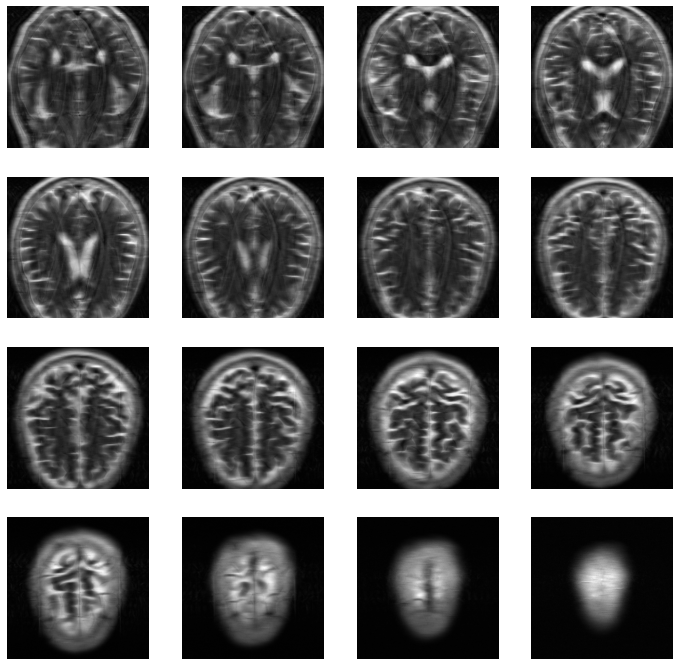

In [3]:
fig, axs = plt.subplots(4, 4)
fig.set_size_inches(12, 12)

slice_idx=0
for ax in axs.ravel():
    X_raw = combine_all_coils(volume_kspace,slice_idx)
    X = resize_scan(X_raw)
    ax.imshow(np.abs(X), cmap='gray')
    ax.set_axis_off()
    slice_idx+=1

fig.savefig('../images/slice_visualization.png', dpi=100)